<h1 style="text-align:center;"> Olympic Gold Medal Analysis </h1>

![Image of olympic athlete with microphone and signs around](images/logo.png)

### Data Sources
* [Olympic Host](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv)    
* [Olympic Medal](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_medals.csv)    
* [Olympic Games (*link missing*)]()     
* [World Population](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset)     
* [GDP (*link missing*)]()

## Proposal Questions
1. Does the host city have an affect on the gold medal count for that country? 
    * 2020 Japapn
2. 
3. 
4. 
5.

# Olympic Analysis

1. Import Libraries
2. Clean & Merge Datasets
3. Analysis #1
4. Analysis #1
5. Analysis #1
6. Analysis #1

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [141]:
# Read in CSV files for retail, olympic host, and olympic medals data
olympic_host_data = pd.read_csv('data/olympic_hosts.csv')
olympic_medals_data = pd.read_csv('data/olympic_analysis.csv')
world_population_data = pd.read_csv('data/world_population.csv')
gdp_data = pd.read_csv('data/gdp.csv')


display(olympic_host_data.head())
display(olympic_medals_data.head())
display(world_population_data.head())
display(gdp_data.head())

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [142]:
# Slice each dataframe to get Summer data only (game_season & edition columns)
olympic_host_data = olympic_host_data[olympic_host_data['game_season'] == 'Summer']
olympic_medals_data = olympic_medals_data[olympic_medals_data['edition'].str.contains('Summer')]

In [143]:
# Slice each dataframe for relevant columns only
olympic_host_data = olympic_host_data[['game_start_date', 'game_end_date', 'game_location', 'game_year']]
olympic_medals_data = olympic_medals_data[['year', 'country', 'gold', 'silver', 'bronze', 'total']]

## Clean and Merge  Datasets
1. Rename Columns to represent dataset & to enable merge capabilities
2. Merge all datasets into one dataframe called 'data'

In [144]:
# Rename game_year column to year
olympic_host_data = olympic_host_data.rename(columns={'game_year' : 'year'})

# Merge dataframes on the year column and inner 
olympic_df = pd.merge(olympic_host_data, olympic_medals_data, on='year', how='inner')
olympic_df


,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113
1,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,People's Republic of China,38,32,19,89
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Japan,27,14,17,58
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Great Britain,22,20,22,64
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,ROC,20,28,23,71
...,...,...,...,...,...,...,...,...,...
1338,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Austria,2,1,2,5
1339,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Australia,2,0,0,2
1340,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Denmark,1,2,3,6
1341,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Switzerland,1,2,0,3


In [145]:
world_population_data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [146]:
# Rename Country/Territory column to country to merge DF
world_population_data = world_population_data.rename(columns={'Country/Territory':'country'})
# Pull out relevant columns from world_population.csv
world_population_data = world_population_data[['country', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']]


In [147]:
# Merge world population with olympic_df on country
olympic_df = pd.merge(olympic_df, world_population_data, on='country', how='inner')
olympic_df.columns

Index(['game_start_date', 'game_end_date', 'game_location', 'year', 'country',
       'gold', 'silver', 'bronze', 'total', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population'],
      dtype='object')

## Clean and Merge GDP to olympic_df

In [148]:
gdp_data = gdp_data.rename(columns={'Country Name' : 'country'})

In [149]:
gdp_data.columns

Index(['country', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [150]:
# Cut down GDP columns to relevant columns for analysis
gdp_data = gdp_data[['country', '1970', '1980', '1990', '2000', '2010', '2015', '2020']]

# Merge GDP columns to olympic_df on country

data = pd.merge(olympic_df, gdp_data, on='country', how='inner')
data

,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total,Continent,...,1990 Population,1980 Population,1970 Population,1970,1980,1990,2000,2010,2015,2020
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113,North America,...,248083732,223140018,200328340,1.073303e+12,2.857307e+12,5.963144e+12,1.025235e+13,1.499205e+13,1.823830e+13,2.095303e+13
1,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Japan,27,14,17,58,Asia,...,123686321,117624196,105416839,2.126092e+11,1.105386e+12,3.132818e+12,4.968359e+12,5.759072e+12,4.444931e+12,5.057759e+12
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Australia,17,7,22,46,Oceania,...,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Netherlands,10,12,14,36,Europe,...,14944548,14130387,13037686,3.816472e+10,1.951521e+11,3.183305e+11,4.164428e+11,8.465549e+11,7.652649e+11,9.138654e+11
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,France,10,12,11,33,Europe,...,56412897,53713830,50523586,1.484564e+11,7.012884e+11,1.269180e+12,1.362249e+12,2.642610e+12,2.438208e+12,2.630318e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Hungary,2,1,3,6,Europe,...,10375989,10698679,10315366,NaN,NaN,NaN,4.721841e+10,1.322311e+11,1.252103e+11,1.558084e+11
1083,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Austria,2,1,2,5,Europe,...,7678729,7547561,7465301,1.537301e+10,8.205891e+10,1.664634e+11,1.967998e+11,3.918927e+11,3.818176e+11,4.332585e+11
1084,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Australia,2,0,0,2,Oceania,...,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12
1085,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Denmark,1,2,3,6,Europe,...,5144623,5125392,4922963,1.707546e+10,7.112753e+10,1.382473e+11,1.641587e+11,3.219953e+11,3.026731e+11,3.560849e+11


In [151]:
data['year'].unique()

array([2020, 2016, 2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980,
       1976, 1972, 1968, 1964, 1960, 1956, 1952, 1948, 1936, 1932, 1928,
       1924, 1920, 1912, 1908, 1904, 1900, 1896])

# Question 1: Is there a significant increase in medal counts for countries that host the Olympics compared to non-hosting years?

1. Research the past three data poin of host cities 
    - Slice dataframe for relevant analysis data
    - Identify all unique host cities



# Evaluate Host City Data from 2020 (Japan)
1. Isolate Japans Gold Medal Production 
    * 2020 Olympic Host Year
    * Average Gold medal count from (2004 - 2016)
2. Create a visualization showing the differences between Japan's gold medal production host years vs non_host year

In [152]:
japan2020_df = data[['game_location', 'year', 'country', 'total']].copy()
japan2020_df = japan2020_df[japan2020_df['year'] == 2020].reset_index(drop=True).sort_values(by='total', ascending=False)
japan2020_df

,game_location,year,country,total
0,Japan,2020,United States,113
1,Japan,2020,Japan,58
2,Japan,2020,Australia,46
6,Japan,2020,Italy,40
5,Japan,2020,Germany,37
...,...,...,...,...
63,Japan,2020,Namibia,1
62,Japan,2020,Lithuania,1
61,Japan,2020,Bahrain,1
48,Japan,2020,Bermuda,1


In [153]:
japan2020_df = japan2020_df.set_index('country')
japan2020_df = japan2020_df.drop(columns=['game_location', 'year'])
japan2020_df = japan2020_df.head()

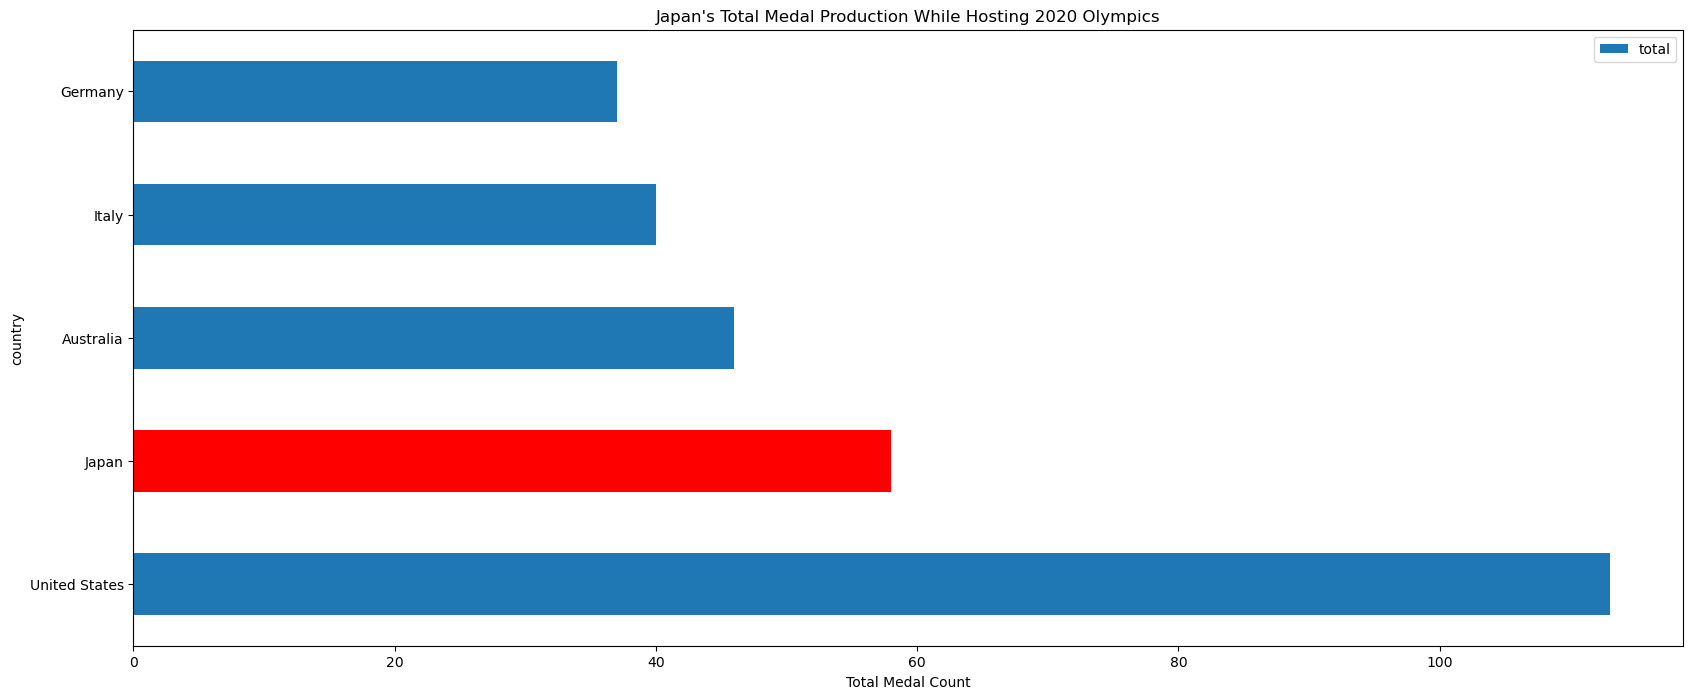

In [154]:
ax = japan2020_df[japan2020_df['total'] > 0].plot(
    kind='barh', 
    title='Japan\'s Total Medal Production While Hosting 2020 Olympics',
    xlabel='Total Medal Count', 
    figsize=[20, 8])

# Get the index of Japan in the DataFrame
japan_index = japan2020_df[japan2020_df['total'] > 0].index.get_loc('Japan')

# Highlight Japan's bar by changing its color to red
ax.patches[japan_index].set_facecolor('red')

# Evaluate 2004 - 2016 Gold Medal Data for Japan

In [156]:
japan2016_df = data[['game_location', 'year', 'country', 'total']].copy()
japan2016_df = japan2016_df[(japan2016_df['total'] > 0) & (japan2016_df['year'] >= 2004) & (japan2016_df['year'] <= 2016)].reset_index(drop=True).sort_values(by='total', ascending=False)
japan2016_df = japan2016_df.groupby('country')['total'].mean().sort_values(ascending=False)
japan2016_df = japan2016_df.head()


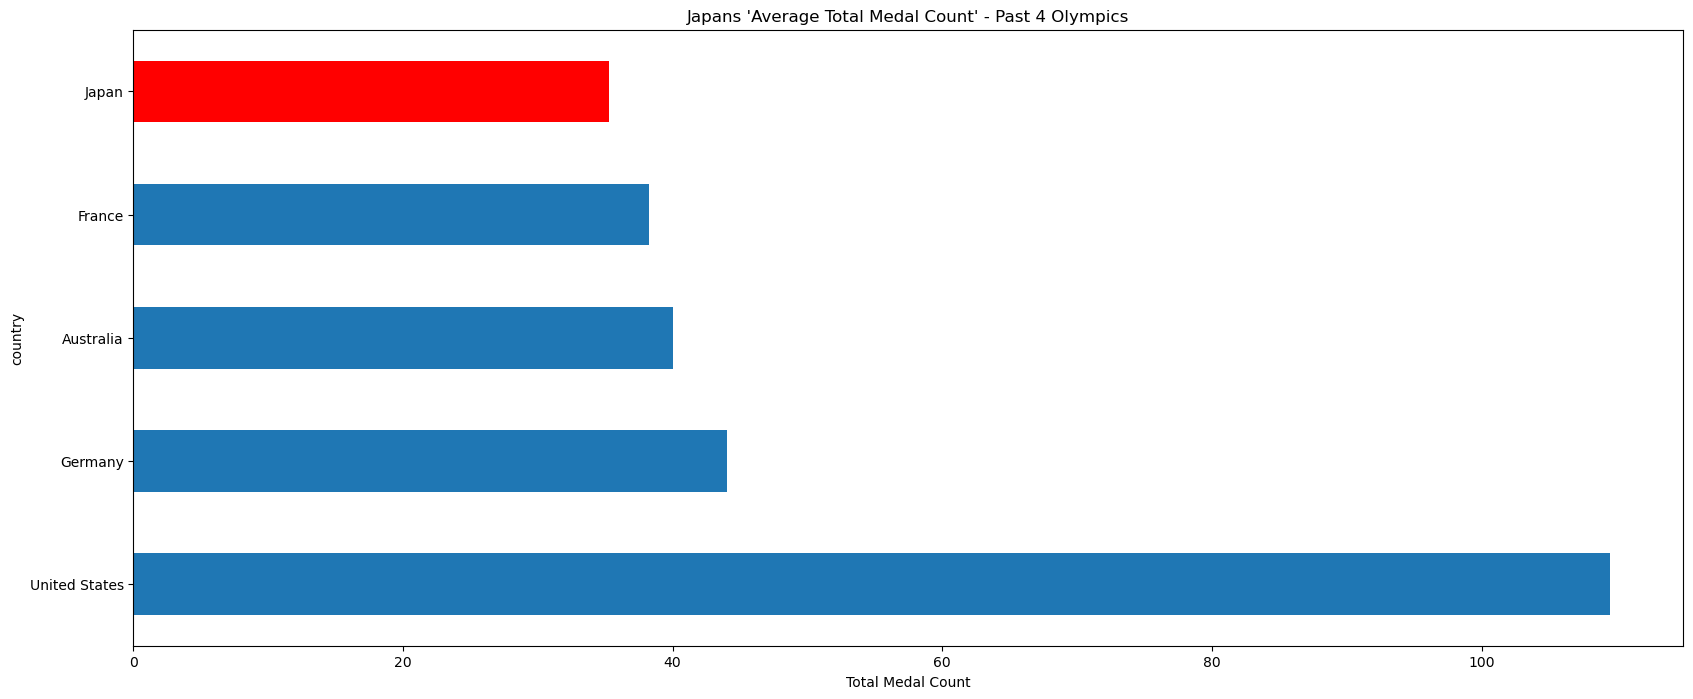

In [159]:
ax = japan2016_df.plot(
    kind='barh', 
    title='Japans \'Average Total Medal Count\' - Past 4 Olympics', 
    xlabel='Total Medal Count',
    figsize=[20, 8])

# Get the index of Japan in the DataFrame
japan_index = japan2016_df.index.get_loc('Japan')

# Highlight Japan's bar by changing its color to red
ax.patches[japan_index].set_facecolor('red')

# Host City Result / Analysis
## Question 1: Is there a significant increase in medal counts for countries that host the Olympics compared to non-hosting years?
**Answer** : Using Japan's as the most recent data acrrued, we analyze that the year that Japan hosted the Olympics they won more than twice as many gold medals than they did in the previous four olympics. 

In [ ]:
hosting_df = data[['year', 'game_location', 'country', 'total']]

## Question #2: Is there a correlation between the Host City Olympic 'Gold' Medals Production vs Non-Host City Olympic 'Gold' Medals Production By Year

1. Calcuate the total number of medals per year  and merge to original dataframe.
2. Pull on relevant columns and plot the results



In [ ]:
# Create empty DataFrames for host year and non-host year data
host_year = []  # Update column names as per your DataFrame
non_host_year = []

# Assuming 'df' is your original DataFrame
for index, row in hosting_df.iterrows():
    if row['country'] == row['game_location']:
        host_year.append(row)
    else:
        non_host_year.append(row)

# Create Host Year and Non-Host Year Dataframes
host_year_df = pd.DataFrame(host_year).set_index('year').sort_index()
non_host_year_df = pd.DataFrame(non_host_year).set_index('year').sort_index()
display(host_year_df.head())
display(non_host_year_df.head())


,game_location,country,total
year,,,
1896,Greece,Greece,47
1900,France,France,112
1904,United States,United States,248
1912,Sweden,Sweden,65
1920,Belgium,Belgium,42


,game_location,country,total
year,,,
1896,Greece,Switzerland,3
1896,Greece,United States,20
1896,Greece,Germany,13
1896,Greece,France,11
1896,Greece,Denmark,6


In [ ]:
# Rename total columns to differentiate dataframes
host_year_df = host_year_df.rename(columns={'total': 'host_total'})
non_host_year_df = non_host_year_df.rename(columns={'total' : 'non_host_total'})

# Drop game_location column 
host_year_df = host_year_df.drop(columns=['game_location', 'country'])
non_host_year_df = non_host_year_df.drop(columns=['game_location', 'country'])

# Sort host_year_df index column
host_year_df = host_year_df.sort_index(ascending=True)
display(host_year_df.head())
display(non_host_year_df.head())

,host_total
year,
1896,47
1900,112
1904,248
1912,65
1920,42


,non_host_total
year,
1896,3
1896,20
1896,13
1896,11
1896,6


In [ ]:
# Calculate the total number of medals per year
gold_medals_by_year = olympic_df.copy()
# Create dataframe of non_host_city gold medals
non_host_gold = gold_medals_by_year[gold_medals_by_year['game_location'] != gold_medals_by_year['country']]
non_host_gold.head()

,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113,North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Australia,17,7,22,46,Oceania,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Netherlands,10,12,14,36,Europe,17564014,17434557,17041107,16617116,15899135,14944548,14130387,13037686
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,France,10,12,11,33,Europe,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586
5,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Germany,10,11,16,37,Europe,83369843,83328988,82073226,81325090,81551677,79370196,77786703,78294583


In [ ]:
non_host_gold = round(non_host_gold.groupby('year')['gold'].sum(), 2).reset_index().copy()
non_host_gold = non_host_gold.rename(columns={'gold':'non_host_gold'})
non_host_gold.head()

,year,non_host_gold
0,1896,30
1,1900,44
2,1904,15
3,1908,52
4,1912,71


In [ ]:
# Pull relevant 2020 and 2022 population columns for analysis
population_df = olympic_df[['year','game_location', 'country', 'gold', 'silver', 'bronze', 'total']]
population_df.head()

,year,game_location,country,gold,silver,bronze,total
0,2020,Japan,United States,39,41,33,113
1,2020,Japan,Japan,27,14,17,58
2,2020,Japan,Australia,17,7,22,46
3,2020,Japan,Netherlands,10,12,14,36
4,2020,Japan,France,10,12,11,33


In [ ]:
# Return all unique host cities 
host_gold_df = population_df[population_df['game_location'] == population_df['country']]

# Drop game_location, gold, silver, and bronze columns and display dataframe
host_gold_df = host_gold_df.drop(columns=['game_location', 'total', 'silver', 'bronze'])
host_gold_df.head()

,year,country,gold
1,2020,Japan,27
86,2016,Brazil,7
311,2004,Greece,6
363,2000,Australia,16
429,1996,United States,44


In [ ]:
host_gold_df = host_gold_df.rename(columns={'gold' : 'host_city_gold'})

# Merge total_medals_by_year with host_medals_df to get the to
host_total_merged_df = pd.merge(host_gold_df, non_host_gold, on='year', how='inner').set_index('year').sort_index()
host_total_merged_df.head()

,country,host_city_gold,non_host_gold
year,,,
1896,Greece,10,30
1900,France,31,44
1904,United States,80,15
1912,Sweden,23,71
1920,Belgium,16,128


<Axes: title={'center': 'Olympics Total Medals vs Host City Total Medals By Year'}, xlabel='Year', ylabel='Number of Medals'>

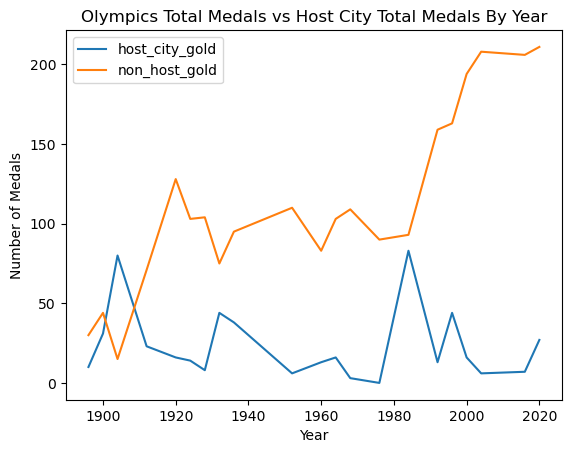

In [ ]:
host_total_merged_df.plot(title="Olympics Total Medals vs Host City Total Medals By Year", xlabel="Year", ylabel="Number of Medals")

## Does Hosting the Olympics Create an Unfair Advantage?

1. Identify Host Countries and Cities
    - Extract which countries and cities have hosted the Olympics from `Olympic_Games` and `olympic_analysis` datasets.
2. Correlate Host Country Population with Medal Count
    - Merge host country data with the `world_population` and `olympic_medals` datasets.
    - Analyze the relationship between host country's population and the number of medlas it wins whne hosting the Olympics.
3. Compare with Global Medal Distribution
    - Compare the host county's medal count with the global medal distribution for the same Olympic Games.
    - Determine if host the Olympics disproportionately benefits the host country, espeicially in relation to its population size. 
4. Visualize the Findings
    - Create visualizatons showing the medal count of host countries versus non-host countries, adjust for population size. 
    - Create a time series to show trends over multiple Olympic Games. 

<hr>

<h2> Step 1. Identify Host Countries and Cities </h2>

In [ ]:
data.columns

Index(['game_start_date', 'game_end_date', 'game_location', 'year', 'country',
       'gold', 'silver', 'bronze', 'total', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', '1970', '1980', '1990', '2000', '2010', '2015',
       '2020'],
      dtype='object')

In [ ]:
# Extract host countries and cities from Olympic_Games.csv
host_cities_df = data[['year', 'country', 'game_location', 'gold', 'total']]
host_cities_df = host_cities_df[host_cities_df['game_location'] == host_cities_df['country']]
# drop country, game_location, and gold for analysis
host_cities_df = host_cities_df.drop(columns=['country', 'game_location', 'gold'])
host_cities_df.head()

,year,total
1,2020,58
82,2016,19
297,2004,16
346,2000,58
410,1996,101


In [ ]:
# Compare with Global Medal Distribution for the same Olympic Games
global_medals_df = data.groupby('year')['total'].sum().reset_index()
global_medals_df.head()

,year,total
0,1896,113
1,1900,239
2,1904,277
3,1908,168
4,1912,264


In [ ]:
merged_global_df = pd.merge(host_cities_df, global_medals_df, how='left', on='year')
merged_global_df = merged_global_df.rename(columns={'total_x':'host_medals', 'total_y': 'global_medals'})
merged_global_df.head()

,year,host_medals,global_medals
0,2020,58,762
1,2016,19,705
2,2004,16,659
3,2000,58,682
4,1996,101,649


In [ ]:
merged_global_df.dtypes

year             int64
host_medals      int64
global_medals    int64
dtype: object

In [ ]:
# Add column host_country_percentage (percentage of total medals won by host country)
merged_global_df['host_medal_percentage'] = (merged_global_df['host_medals'])/(merged_global_df['global_medals']) * 100
merged_global_df.head()

,year,host_medals,global_medals,host_medal_percentage
0,2020,58,762,7.611549
1,2016,19,705,2.695035
2,2004,16,659,2.427921
3,2000,58,682,8.504399
4,1996,101,649,15.562404


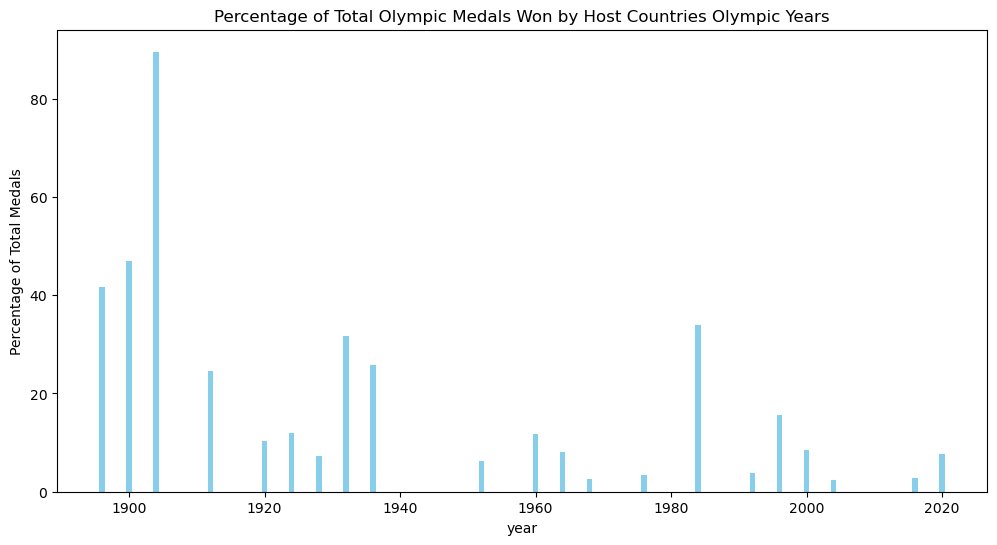

In [ ]:
# Visualize comparison
plt.figure(figsize=(12,6))
plt.bar(merged_global_df['year'], merged_global_df['host_medal_percentage'], color='skyblue')
plt.title('Percentage of Total Olympic Medals Won by Host Countries Olympic Years')
plt.xlabel('year')
plt.ylabel('Percentage of Total Medals')
plt.show()

# Investigate the correlation between 2020 Total Medal Count, World Population, and GDP

In [ ]:
# Set up world population
pop_dict = {}
pop_years = [2020, 2015, 2010, 2000, 1990, 1980, 1970]
world_population = data[['year','country', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', '1970', '1980', '1990', '2000', '2010', '2015',
       '2020', 'total']].copy()
world_population.head()

,year,country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,1970,1980,1990,2000,2010,2015,2020,total
0,2020,United States,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,1.073303e+12,2.857307e+12,5.963144e+12,1.025235e+13,1.499205e+13,1.823830e+13,2.095303e+13,113
1,2020,Japan,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,2.126092e+11,1.105386e+12,3.132818e+12,4.968359e+12,5.759072e+12,4.444931e+12,5.057759e+12,58
2,2020,Australia,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12,46
3,2020,Netherlands,17564014,17434557,17041107,16617116,15899135,14944548,14130387,13037686,3.816472e+10,1.951521e+11,3.183305e+11,4.164428e+11,8.465549e+11,7.652649e+11,9.138654e+11,36
4,2020,France,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586,1.484564e+11,7.012884e+11,1.269180e+12,1.362249e+12,2.642610e+12,2.438208e+12,2.630318e+12,33


In [ ]:
filtered_data = world_population.loc[world_population['year'].isin(pop_years)].copy()
filtered_data = filtered_data.rename(columns={'2020': '2020 GDP', 'total': 'Total Medals'})
filtered_data.head()

,year,country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,1970,1980,1990,2000,2010,2015,2020 GDP,Total Medals
0,2020,United States,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,1.073303e+12,2.857307e+12,5.963144e+12,1.025235e+13,1.499205e+13,1.823830e+13,2.095303e+13,113
1,2020,Japan,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,2.126092e+11,1.105386e+12,3.132818e+12,4.968359e+12,5.759072e+12,4.444931e+12,5.057759e+12,58
2,2020,Australia,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12,46
3,2020,Netherlands,17564014,17434557,17041107,16617116,15899135,14944548,14130387,13037686,3.816472e+10,1.951521e+11,3.183305e+11,4.164428e+11,8.465549e+11,7.652649e+11,9.138654e+11,36
4,2020,France,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586,1.484564e+11,7.012884e+11,1.269180e+12,1.362249e+12,2.642610e+12,2.438208e+12,2.630318e+12,33


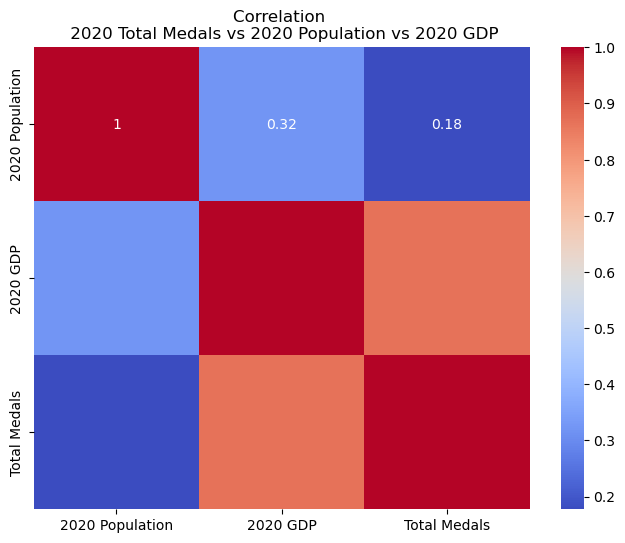

In [ ]:
# Create 2020 correlation dataframe
correlation_2020 = filtered_data[filtered_data['year'] == 2020].copy() 
correlation_2020 = correlation_2020[["2020 Population", "2020 GDP", "Total Medals"]]

# Calculate the correlation
correlation_2020 = correlation_2020.corr()

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_2020, annot=True, cmap='coolwarm', cbar= True)

# Create correlation title
plt.title('Correlation \n 2020 Total Medals vs 2020 Population vs 2020 GDP')

# Display heatmap
plt.show()